In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import cv2
import glob


In [3]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('./calpics/*.JPG')
print images

for num,fname in enumerate(images,1):
    print fname
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print("ret true")
        objpoints.append(objp)

        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners,ret)
        #plt.imshow(img)
        #plt.show()
        #cv2.imwrite("CAL"+str(num)+".JPG", img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()

['./calpics/IMG_0001.JPG', './calpics/IMG_0002.JPG', './calpics/IMG_0006.JPG', './calpics/IMG_0012.JPG', './calpics/IMG_0013.JPG', './calpics/IMG_0007.JPG', './calpics/IMG_0005.JPG', './calpics/IMG_0010.JPG', './calpics/IMG_0009.JPG', './calpics/IMG_0008.JPG']
./calpics/IMG_0001.JPG
ret true
./calpics/IMG_0002.JPG
ret true
./calpics/IMG_0006.JPG
ret true
./calpics/IMG_0012.JPG
ret true
./calpics/IMG_0013.JPG
ret true
./calpics/IMG_0007.JPG
ret true
./calpics/IMG_0005.JPG
ret true
./calpics/IMG_0010.JPG
ret true
./calpics/IMG_0009.JPG
./calpics/IMG_0008.JPG
ret true


In [4]:
ret, kmtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print kmtx
print dist

[[4.58524148e+03 0.00000000e+00 1.75807753e+03]
 [0.00000000e+00 4.56395837e+03 9.99814307e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-1.22563411e-01 -1.94226387e+00  3.50139041e-03 -1.22048460e-03
   1.24324536e+01]]


In [5]:
img = cv2.imread('parallax1.JPG')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(kmtx,dist,(w,h),1,(w,h))
print roi
print kmtx
print newcameramtx

(64, 18, 3377, 2267)
[[4.58524148e+03 0.00000000e+00 1.75807753e+03]
 [0.00000000e+00 4.56395837e+03 9.99814307e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[4.49392822e+03 0.00000000e+00 1.75536035e+03]
 [0.00000000e+00 4.46582617e+03 1.00414873e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [6]:
mean_error = 0
for i in xrange(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], kmtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error**2

print "total error: ", mean_error/len(objpoints)

total error:  0.115155401174


In [7]:
pic1 = cv2.imread("parallax1.JPG")
pic2 = cv2.imread("parallax2.JPG")

In [8]:
# undistort
#dst = cv2.undistort(pic1, kmtx, dist, None, newcameramtx)
dst = cv2.undistort(pic1, kmtx, dist, None, newcameramtx)

 
# crop the image
x,y,w,h = roi
#pic1result = dst
pic1result = dst[y:y+h, x:x+w]
cv2.imwrite('pic1result.png', pic1result)

True

In [9]:
 # undistort
#dst = cv2.undistort(pic2, kmtx, dist, None, newcameramtx)
dst = cv2.undistort(pic2, kmtx, dist, None, newcameramtx)
print dst
 
 # crop the image
x,y,w,h = roi
#pic2result = dst
pic2result = dst[y:y+h, x:x+w]
cv2.imwrite('pic2result.png', pic2result)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


True

In [10]:
gray1 = cv2.cvtColor(pic1result,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(pic2result,cv2.COLOR_BGR2GRAY)

In [11]:

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [12]:
pts1all = np.float32(list(pts1))
pts2all = np.float32(list(pts2))
F, mask = cv2.findFundamentalMat(pts1all,pts2all,cv2.FM_RANSAC)

print mask.shape

# We select only inlier points
pts1 = pts1all[mask.ravel()==1]
pts2 = pts2all[mask.ravel()==1]

(320, 1)


True

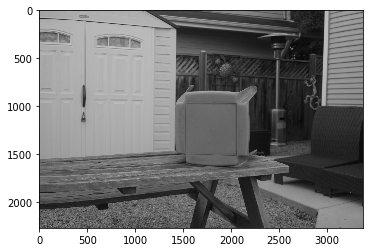

In [13]:
pic1points = gray1.copy()
#pic1points = cv2.drawKeypoints(gray1,kp1,pic1points, color=(0,255,0))
pic1points = cv2.drawKeypoints(gray1,[],pic1points, color=(0,255,0))
plt.imshow(pic1points)
cv2.imwrite("pic1points.JPG", pic1points)

True

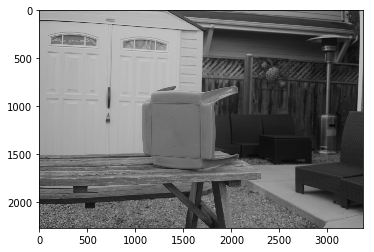

In [14]:
pic2points = gray2.copy()
#pic2points = cv2.drawKeypoints(gray2,kp2,pic2points, color=(0,255,0))
pic2points = cv2.drawKeypoints(gray2,[],pic2points, color=(0,255,0))
plt.imshow(pic2points)
cv2.imwrite("pic2points.JPG", pic2points)

In [15]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

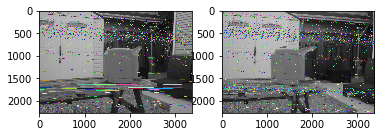

True

In [16]:
 # Find epilines corresponding to points in right image (second image) and
 # drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(gray1,gray2,lines1,pts1,pts2)
 
 # Find epilines corresponding to points in left image (first image) and
 # drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(gray2,gray1,lines2,pts2,pts1)
 
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()
cv2.imwrite("epipoles1.JPG", img5)
cv2.imwrite("epipoles2.JPG", img3)

In [17]:

E, _ = cv2.findEssentialMat(pts1, pts2, newcameramtx)
#E, _ = cv2.findEssentialMat(pts1, pts2, kmtx)
print E

[[-0.00785315 -0.06052124  0.03725962]
 [ 0.18476841  0.00699408 -0.68140282]
 [-0.02722665  0.70401507  0.00326105]]


In [18]:
R1, R2, t = cv2.decomposeEssentialMat(E)


In [19]:
print R1
print R2
# print t
print pts1.shape

[[ 0.93516539  0.08962653  0.34268468]
 [ 0.09022052 -0.99581996  0.01424276]
 [ 0.34252877  0.01759785 -0.93934251]]
[[ 0.98379726 -0.01782743  0.17839601]
 [ 0.01549427  0.99977534  0.01446334]
 [-0.17861377 -0.01146488  0.98385247]]
(248, 2)


In [20]:
posebase = np.matmul(newcameramtx, np.append(np.identity(3), np.zeros_like(t), axis=1))

pose1pos = np.matmul(newcameramtx, np.append(R1, t, axis=1))
pose2pos = np.matmul(newcameramtx, np.append(R2, t, axis=1))

pose1neg = np.matmul(newcameramtx, np.append(R1, -t, axis=1))
pose2neg = np.matmul(newcameramtx, np.append(R2, -t, axis=1))


In [21]:
pts1float = pts1.astype(np.float32)
pts1formatted = pts1float[:, np.newaxis, :]
pts1undist = cv2.undistortPoints(pts1formatted, newcameramtx, dist, P=newcameramtx)
pts1undist = pts1.astype(np.float32)

pts2float = pts2.astype(np.float32)
pts2formatted = pts2float[:, np.newaxis, :]
pts2undist = cv2.undistortPoints(pts2formatted, newcameramtx, dist, P=newcameramtx)
pts2undist = pts2.astype(np.float32)


In [25]:
pb = posebase.copy()
p = pose2neg.copy()
p1 = pts1undist.copy()
p2 = pts2undist.copy()


print ("R1", R1)
print ("-t", -t)

ptsHomo = cv2.triangulatePoints(np.squeeze(pb), np.squeeze(p), np.squeeze(p1).transpose(), np.squeeze(p2).transpose())


('R1', array([[ 0.93516539,  0.08962653,  0.34268468],
       [ 0.09022052, -0.99581996,  0.01424276],
       [ 0.34252877,  0.01759785, -0.93934251]]))
('-t', array([[-0.99487409],
       [-0.05480717],
       [-0.0849807 ]]))


In [26]:
poscount = negcount = nancount= 0
for i in range(0, len(ptsHomo[0])):
    if math.isnan(ptsHomo[3][i]) or ptsHomo[3][i] == 0:
        nancount += 1
        continue;
    if (ptsHomo[2][i]/ptsHomo[3][i] < 0):
        negcount += 1
    else:
        poscount += 1

print poscount
print negcount
print nancount

247
1
0


In [27]:
ptsEuclid = []
for i in range(0, ptsHomo[0].size):
    euclidPt = np.array([ptsHomo[0][i]/ptsHomo[3][i], ptsHomo[1][i]/ptsHomo[3][i], ptsHomo[2][i]/ptsHomo[3][i]])
    print(euclidPt)
    ptsEuclid.append(euclidPt)
    
#Cleaning points
ptsEuclid = [pt for pt in ptsEuclid if pt[2] > 0 and pt[2] < 50]
    
ptsSensor = []
for i in range(0, len(ptsEuclid)):
    vec = ptsEuclid[i].reshape(3, 1)
    homovec = np.matmul(newcameramtx, vec)
    homovec = np.squeeze(homovec)
    ptsSensor.append((int(round(homovec[0]/homovec[2])), int(round(homovec[1]/homovec[2]))))


z_list = [z for x,y,z in ptsEuclid if z > 0]

[  9.902746   4.991585 -30.963995]
[-2.3652258 -1.22649    7.4681473]
[-2.3360465 -1.2488382  7.4733458]
[-2.3360465 -1.2488382  7.4733458]
[-2.232296  -1.5709275  7.535611 ]
[-2.2225745 -1.5826608  7.534263 ]
[-2.2103045 -1.5989721  7.5450773]
[-2.2050312 -1.5869497  7.5418043]
[-2.1978629 -1.4946221  7.525934 ]
[-2.1993701   0.10857731  7.594545  ]
[-2.1922793 -1.5037414  7.5808473]
[-2.1855175  0.1927314  7.5959044]
[-2.1837926   0.23322667  7.5900874 ]
[-2.1837926   0.23322667  7.5900874 ]
[-2.1860693 -0.3910132  7.602134 ]
[-2.177958   -0.02227175  7.593106  ]
[-2.177958   -0.02227175  7.593106  ]
[-2.1789842  -0.34978798  7.6004624 ]
[-2.0639553 -1.4302081  7.218384 ]
[-1.1912932  0.5155668  4.1731353]
[-1.7133837  1.5774921  6.0050826]
[-2.1569047 -1.5089784  7.5638905]
[-2.1394475 -1.5901575  7.5900126]
[-2.1316695 -1.508902   7.59593  ]
[-2.1309037 -1.4981873  7.6130924]
[-1.6955419  1.5725694  6.067023 ]
[-1.6955419  1.5725694  6.067023 ]
[-2.0985408 -1.5959846  7.593041 ]
[-

Projecting triangulated points to image 1...


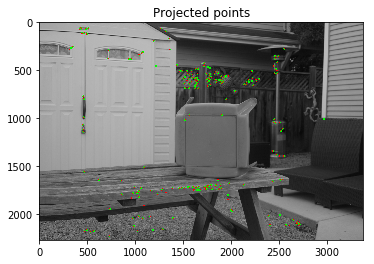

done!


In [43]:
projImage = pic1points.copy()
print("Projecting triangulated points to image 1...")
for point, projection, threedeepoint in zip(pts1, ptsSensor, ptsEuclid):
    cv2.circle(projImage, tuple(point), 6, (0, 0, 255), -1)
    if threedeepoint[2] < 0:
        continue
    cv2.circle(projImage, projection, 10, (0, 255, 0), -1)
plt.imshow(cv2.cvtColor(projImage,cv2.COLOR_BGR2RGB))
plt.title("Projected points")
plt.show()
print("done!")

In [29]:

z_list.sort()
#print z_list
z_max, z_min = max(z_list), min(z_list)
print z_max
print z_min
#minZ = np.max(ptsE)

13.902747
3.3648143


In [30]:
newcameramtx_inv = np.linalg.inv(newcameramtx)
n_vector = np.array([[0.], [0.], [-1.]])
n_vector_trans = n_vector.transpose()
#print n_vector_trans.shape
Homography_vec = []

for d in np.linspace(z_min, z_max, 20):
    rn_by_d = np.matmul(-t, n_vector_trans)/d
    H = R2 - rn_by_d
    KH = np.matmul(newcameramtx, H)
    KHM = np.matmul(KH, newcameramtx_inv)
    Homography_vec.append(KHM)


In [31]:
warped_img_list = []

for Homography,d in zip(Homography_vec, np.linspace(z_min, z_max, 20)):
    im = cv2.warpPerspective(pic2points.copy(), Homography, (pic2points.shape[1], pic2points.shape[0]))
    #cv2.imwrite("img"+str(i)+".JPG", im)
    warped_img_list.append((im, d))
    #plt.imshow(im)
    #plt.show()
    

In [32]:
#NOTE change t back if changing images


In [33]:
originalpic = pic1points.copy().astype(np.int16)
processed_list = []
t_mag = np.linalg.norm(t)
print t_mag
combined_differences = np.ones_like(originalpic) * z_min

for warped,d in warped_img_list:
    differences = np.zeros_like(originalpic).astype(np.int16)
    warped = warped.astype(np.int16)
    abs_diff = np.abs(originalpic - warped)
    abs_diff_filtered = cv2.boxFilter(abs_diff, 3, (25, 25))
    processed_list.append((abs_diff_filtered, d))
    


1.0


In [34]:
# combined_differences = np.zeros_like(originalpic).astype(np.int16)
# print combined_differences.shape
# from IPython.display import clear_output

# #print processed_list[0]
# print 2267 * 3377

# for (x, y) in np.ndindex(2267, 3377):
#     print (str(x/2267.))
#     clear_output()
#     sad_list = [image[x][y] * d for image, d in processed_list]
#     combined_differences[x][y] = np.amin(sad_list, axis=0)

d_list = []
for d in np.linspace(z_min, z_max, 20):
    d_list.append(d)


    

for x, col in enumerate(combined_differences):
    if (x % 100 == 0):
        print x
    for y, row in enumerate(combined_differences[x]):
        sad_list = np.array([image[x][y] for image, _ in processed_list])
        min_d_index = np.argmin(sad_list, axis=0)[0]
        combined_differences[x][y] = d_list[min_d_index]
        
        #break
    #break


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


13.902747
3.3648143


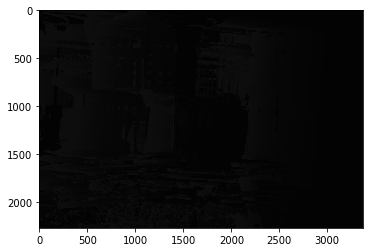

In [35]:
print np.amax(combined_differences)
print np.amin(combined_differences)
scaled_heatmap = combined_differences.astype(np.float32) * 255 / z_max

plt.show()
cv2.imwrite("heatmap.JPG", scaled_heatmap.astype(np.float32))
plt.imshow(combined_differences.astype(np.uint8))
plt.show()

In [36]:
originalpic_half = 0.5 * pic1points.copy().astype(np.float32)
for index, (warped, d) in enumerate(warped_img_list):
    warped_half = 0.5 * warped
    cv2.imwrite("overlayed"+str(index)+".JPG", originalpic_half + warped_half)

In [239]:
print(scaled_heatmap)

[[[ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  ...
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]]

 [[ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  ...
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]]

 [[ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  [ 63.85649   63.85649   63.85649 ]
  ...
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]
  [212.52367  212.52367  212.52367 ]]

 ...

 [[ 53.237408  53.237408  53.237408]
  [ 53.237408  53.237408  53.237408]
  [ 53.237408  53.237408  53.237408]
  ...
  [106.33283  106.33283  106.33283 ]
  [106.33283  106.33283  106.33283 ]
  [106.33283  106.33283  106.33283 ]]

 [[ 53.237408  53.237408  53.237408]
  [ 53.237408  53.237408  53.237408]
